<a href="https://colab.research.google.com/github/cooeoeooc/2178_g38/blob/main/Copy_of_group38_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [491]:
import pandas as pd
import numpy as np

In [492]:
np.random.seed(123)

# Data Preprocessing and Cleaning

In [493]:
data = pd.read_csv("https://raw.githubusercontent.com/cooeoeooc/2178_g38/main/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
data.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [494]:
def test_na_num(df):
    for column in df:
        print(sum(df[column].isna()), column)

In [495]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
469 ArrestID
0 PersonID
4 Perceived_Race
0 Sex
24 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
165 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
57475 SearchReason_CauseInjury
57475 SearchReason_AssistEscape
57475 SearchReason_PossessWeapons
57475 SearchReason_PossessEvidence
57475 ItemsFound
0 ObjectId


In [496]:
data=data.dropna(subset=['ArrestID','Age_group__at_arrest_','Perceived_Race','Occurrence_Category'])
data=data.fillna(0)

In [497]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
0 ArrestID
0 PersonID
0 Perceived_Race
0 Sex
0 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
0 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
0 SearchReason_CauseInjury
0 SearchReason_AssistEscape
0 SearchReason_PossessWeapons
0 SearchReason_PossessEvidence
0 ItemsFound
0 ObjectId


In [498]:
# exchange 0 and 1, 0 means cooperative, 1 means otherwise.
data['Actions_at_arrest___Cooperative'] = data['Actions_at_arrest___Cooperative'].replace({0: 1, 1: 0})

Cleaning existing variables. 

Establishing exclusion criteria – based on popular Occurrence Categories. 

In [499]:
data["Occurrence_Category"].value_counts() # seeing most popular categories

occurrence_replacement_dict={'Assault & Other crimes against persons':0,
                  'Assault':0,
                 'Robbery & Theft':1,
                 'Robbery/Theft':1,
                 'Warrant':2,
                 'FTA/FTC/Compliance Check/Parollee':3,
                 'FTA/FTC, Compliance Check & Parollee':3,
                 'Police Category - Administrative':4,
                 'Drug Related':5}

data["Occurrence_Category"] = data["Occurrence_Category"].replace(occurrence_replacement_dict)
data["Occurrence_Category"] = data["Occurrence_Category"].where(data["Occurrence_Category"].isin(list(occurrence_replacement_dict.values())) == True, 6)

Creating new variables. 

In [500]:
data["Age_group_clean"] = data["Age_group__at_arrest_"].replace({"Aged 17 years and younger": "Aged 17 years and under", "Aged 65 and older": "Aged 65 years and older"})

In [501]:
# rearrange searchreasons, the attributes contains 5 values, 0 means no search reason, 1 means one search reason, etc.
data["SearchReasonCount"] = data["SearchReason_CauseInjury"] + data["SearchReason_AssistEscape"] + data["SearchReason_PossessWeapons"] + data["SearchReason_PossessEvidence"]
data["SearchReasonCount"] = np.where(data["SearchReasonCount"].isna() == True, 0, data["SearchReasonCount"])

In [502]:
data["UncooperativeActionsCount"] = data["Actions_at_arrest___Concealed_i"] + data["Actions_at_arrest___Combative__"] + data["Actions_at_arrest___Resisted__d"] + data["Actions_at_arrest___Mental_inst"] + data["Actions_at_arrest___Assaulted_o"]

In [503]:
data["Time_series"] = np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Jan-Mar"), 1, 
                               (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Apr-June"), 2, 
                                         (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "July-Sept"), 3, 
                                                   (np.where((data["Arrest_Year"] == 2020) & (data["Arrest_Month"] == "Oct-Dec"), 4, 
                                                             (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Jan-Mar"), 5, 
                                                                       (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Apr-June"), 6, 
                                                                                 (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "July-Sept"), 7, 
                                                                                           (np.where((data["Arrest_Year"] == 2021) & (data["Arrest_Month"] == "Oct-Dec"), 8, 0)))))))))))))))

In [504]:
data["Race_White"] = np.where(data["Perceived_Race"] == "White", 1, 0)

In [505]:
test_na_num(data)

0 Arrest_Year
0 Arrest_Month
0 EventID
0 ArrestID
0 PersonID
0 Perceived_Race
0 Sex
0 Age_group__at_arrest_
0 Youth_at_arrest__under_18_years
0 ArrestLocDiv
0 StripSearch
0 Booked
0 Occurrence_Category
0 Actions_at_arrest___Concealed_i
0 Actions_at_arrest___Combative__
0 Actions_at_arrest___Resisted__d
0 Actions_at_arrest___Mental_inst
0 Actions_at_arrest___Assaulted_o
0 Actions_at_arrest___Cooperative
0 SearchReason_CauseInjury
0 SearchReason_AssistEscape
0 SearchReason_PossessWeapons
0 SearchReason_PossessEvidence
0 ItemsFound
0 ObjectId
0 Age_group_clean
0 SearchReasonCount
0 UncooperativeActionsCount
0 Time_series
0 Race_White


In [506]:
data.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Age_group_clean,SearchReasonCount,UncooperativeActionsCount,Time_series,Race_White
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,0.0,1,Aged 35 to 44 years,0.0,0,3,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,0.0,2,Aged 35 to 44 years,0.0,0,3,1
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0.0,0.0,0.0,0.0,3,Aged 35 to 44 years,0.0,0,4,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0.0,0.0,0.0,0.0,4,Aged 25 to 34 years,0.0,0,5,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0.0,0.0,0.0,0.0,5,Aged 25 to 34 years,0.0,0,5,0


In [507]:
data = data.drop(["PersonID", "Age_group__at_arrest_", "Booked", "ObjectId"], axis = 1)

In [508]:
data1=data

In [509]:
data = data[["Time_series",'Arrest_Year','Arrest_Month', "Perceived_Race", "Sex", "Youth_at_arrest__under_18_years",'Race_White', "StripSearch", "Occurrence_Category", "ItemsFound","SearchReasonCount",'UncooperativeActionsCount','Age_group_clean']]
data = data.dropna(subset = ["Perceived_Race", "Occurrence_Category"])

# EDA

## Visualizations

In [510]:
import matplotlib.pyplot as plt

In [511]:
StripSearch_1_data = data[data["StripSearch"] == 1]

In [512]:
data["Age_group_clean"].value_counts().sort_index(ascending = True)

Aged 17 years and under     3012
Aged 18 to 24 years         9934
Aged 25 to 34 years        20725
Aged 35 to 44 years        16072
Aged 45 to 54 years         9003
Aged 55 to 64 years         4553
Aged 65 years and older     1316
Name: Age_group_clean, dtype: int64

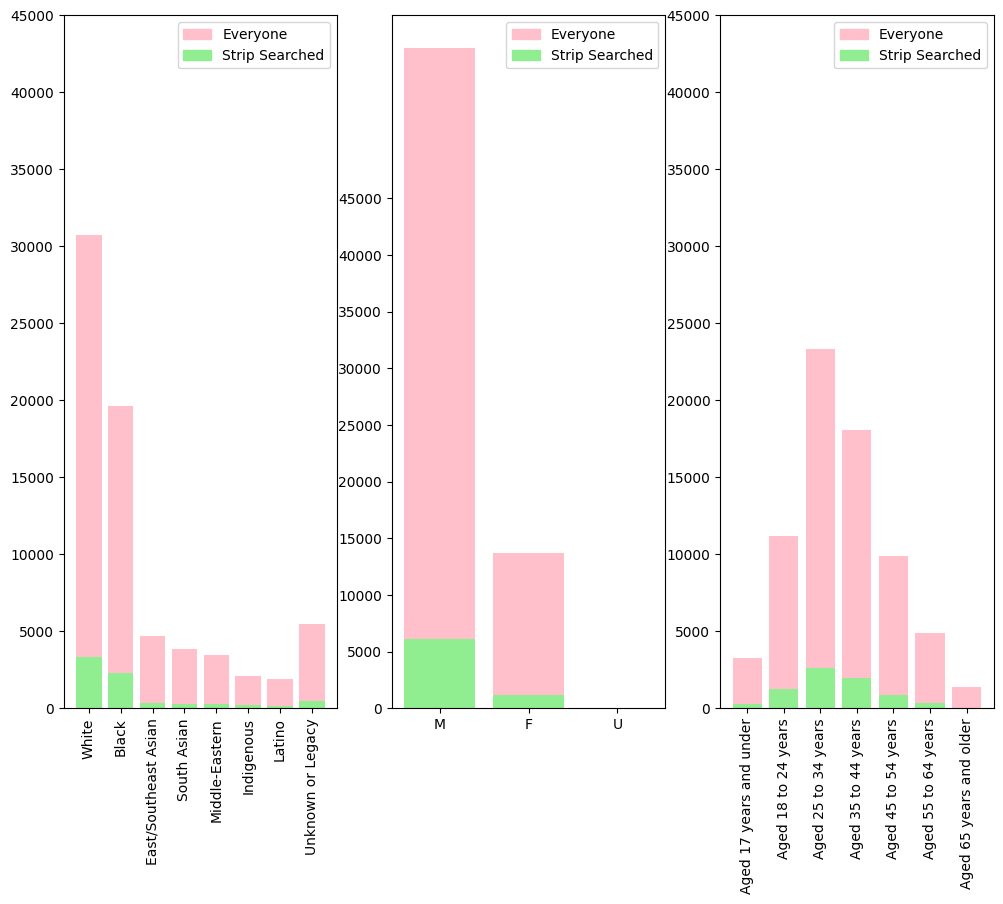

In [513]:
plt.figure(figsize=(12,9))

colours = {"Everyone": "pink", "Strip Searched": "lightgreen"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]

plt.subplot(1, 3, 1) # strip searches by perceived race
races = data["Perceived_Race"].value_counts().index.tolist()
legacy = races.pop(2)
races.append(legacy)

race_counts = data["Perceived_Race"].value_counts().values.tolist()
legacy = race_counts.pop(2)
race_counts.append(legacy)

stripsearch_race_counts = StripSearch_1_data["Perceived_Race"].value_counts().values.tolist()
legacy = stripsearch_race_counts.pop(2)
stripsearch_race_counts.append(legacy)

plt.bar(races, race_counts, bottom = stripsearch_race_counts, color = "pink")
plt.bar(races, stripsearch_race_counts, color = "lightgreen")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)

plt.subplot(1, 3, 2) # strip searches by sex
sexes = data["Sex"].value_counts().index.tolist()
sex_counts = data["Sex"].value_counts().values.tolist()

stripsearch_sex_counts = StripSearch_1_data["Sex"].value_counts().values.tolist()
stripsearch_sex_counts.append(0)

plt.bar(sexes, sex_counts, bottom = stripsearch_sex_counts, color = "pink")
plt.bar(sexes, stripsearch_sex_counts, color = "lightgreen")
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)

plt.subplot(1, 3, 3) # strip searches by age
ages = data["Age_group_clean"].value_counts().index.tolist()
reordered_1 = ages.pop(ages.index("Aged 17 years and under"))
reordered_2 = ages.pop(ages.index("Aged 18 to 24 years"))
ages.insert(0, reordered_1)
ages.insert(1, reordered_2)

age_counts = data["Age_group_clean"].value_counts().sort_index(ascending = True).values.tolist()

stripsearch_age_counts = StripSearch_1_data["Age_group_clean"].value_counts().sort_index(ascending = True).values.tolist()

plt.bar(ages, age_counts, bottom = stripsearch_age_counts, color = "pink")
plt.bar(ages, stripsearch_age_counts, color = "lightgreen")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 50000, 5000))
plt.legend(handles, labels)

Text(0, 0.5, 'Number of Strip Searches Booked')

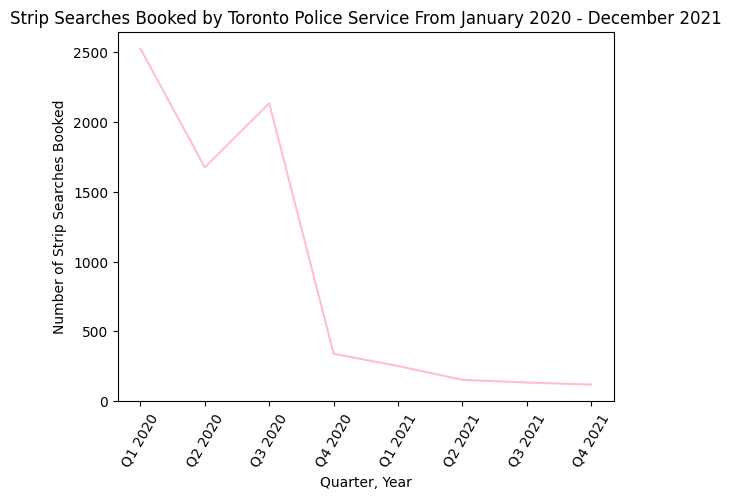

In [514]:
StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts()
StripSearch_1_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "pink")
plt.title("Strip Searches Booked by Toronto Police Service From January 2020 - December 2021")
axes = plt.gca()
axes.set_xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7])
axes.set_xticklabels(["Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020", "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021"])
plt.xticks(rotation = 60)
plt.xlabel("Quarter, Year")
plt.ylabel("Number of Strip Searches Booked")

Text(0, 0.5, 'Number of Strip Searches Booked')

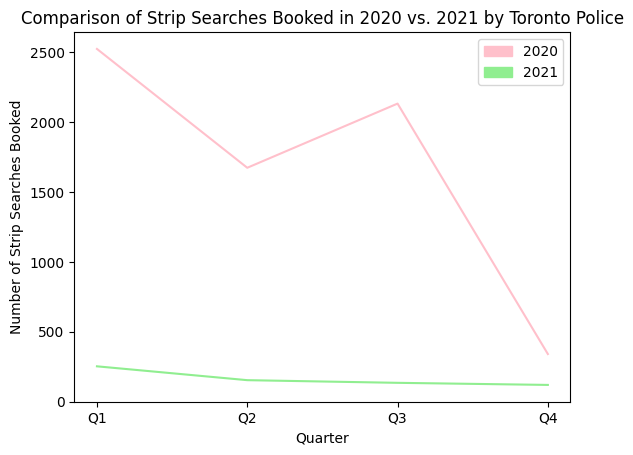

In [515]:
StripSearch_1_2020_data = data[(data["Arrest_Year"] == 2020) & (data["StripSearch"] == 1)]
StripSearch_1_2021_data = data[(data["Arrest_Year"] == 2021) & (data["StripSearch"] == 1)]

plt1 = StripSearch_1_2020_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "pink")
plt2 = StripSearch_1_2021_data.groupby(["Time_series"])["StripSearch"].value_counts().sort_index(ascending = True).plot(color = "lightgreen")
plt_axes = plt.gca()
plt_axes.set_xticks([0, 1, 2, 3])
plt_axes.set_xticklabels(["Q1", "Q2", "Q3", "Q4"])

colours = {"2020": "pink", "2021": "lightgreen"}
labels = list(colours.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colours[label]) for label in labels]
plt.legend(handles, labels)

plt.title("Comparison of Strip Searches Booked in 2020 vs. 2021 by Toronto Police")
plt.xlabel("Quarter")
plt.ylabel("Number of Strip Searches Booked")

In [516]:
data

,Time_series,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Race_White,StripSearch,Occurrence_Category,ItemsFound,SearchReasonCount,UncooperativeActionsCount,Age_group_clean
0,3,2020,July-Sept,White,M,Not a youth,1,0,0,0.0,0.0,0,Aged 35 to 44 years
1,3,2020,July-Sept,White,M,Not a youth,1,0,0,0.0,0.0,0,Aged 35 to 44 years
2,4,2020,Oct-Dec,Unknown or Legacy,M,Not a youth,0,0,0,0.0,0.0,0,Aged 35 to 44 years
3,5,2021,Jan-Mar,Black,M,Not a youth,0,0,6,0.0,0.0,0,Aged 25 to 34 years
4,5,2021,Jan-Mar,South Asian,M,Not a youth,0,0,3,0.0,0.0,0,Aged 25 to 34 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,8,2021,Oct-Dec,Indigenous,F,Not a youth,0,0,6,0.0,0.0,1,Aged 25 to 34 years
65272,8,2021,Oct-Dec,South Asian,M,Not a youth,0,0,0,0.0,0.0,0,Aged 35 to 44 years
65273,8,2021,Oct-Dec,White,F,Not a youth,1,0,0,0.0,0.0,0,Aged 45 to 54 years
65274,8,2021,Oct-Dec,Unknown or Legacy,M,Youth (aged 17 years and under),0,0,1,0.0,0.0,0,Aged 17 years and under


In [517]:
for item in data['Occurrence_Category']:
  if type(item)==str:
    print(item)

In [518]:
print(data.columns)

Index(['Time_series', 'Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex',
       'Youth_at_arrest__under_18_years', 'Race_White', 'StripSearch',
       'Occurrence_Category', 'ItemsFound', 'SearchReasonCount',
       'UncooperativeActionsCount', 'Age_group_clean'],
      dtype='object')


In [519]:
#import seaborn as sns

#corr_matrix = data.corr()
#fig, ax = plt.subplots()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, fmt = "0.2f")
#ax.set_title('Correlation Heatmap')

#plt.show()

## t-tests

# Feature Engineering

## Numerical representation

In [520]:
race_dict = {"White": 0,
             "Unknown or Legacy": 1,
             "Black":2,
             "South Asian":3,
             "Indigenous":4,
             "Middle-Eastern":5, 
             "Latino": 6,
             "East/Southeast Asian":7}

data['Perceived_Race'] = data['Perceived_Race'].replace(race_dict)

In [521]:
sex_dict= {'M':0,'F':1,'U':2}

data['Sex'] = data['Sex'].replace(sex_dict)

In [522]:
age_dict={'Aged 17 years and under': 0,
          'Aged 18 to 24 years': 1,
          'Aged 25 to 34 years': 2,
          'Aged 35 to 44 years': 3,
          'Aged 45 to 54 years': 4,
          'Aged 55 to 64 years': 5,
          'Aged 65 years and older': 6,
          }

data['Age_group_clean'] = data['Age_group_clean'].replace(age_dict)

In [523]:
youth_dict={'Youth (aged 17 and younger)': 0,
            'Youth (aged 17 years and under)': 0, 
            'Not a youth': 1}

data['Youth_at_arrest__under_18_years'] = data['Youth_at_arrest__under_18_years'].replace(youth_dict)

In [524]:
data = data.dropna()

## One-hot encoding

In [525]:
#data=data1

In [526]:
#categorical = data.columns.tolist()
#categorical.pop(categorical.index("Youth_at_arrest__under_18_years"))
#categorical.pop(categorical.index("StripSearch"))
#categorical.pop(categorical.index("Actions_at_arrest___Concealed_i"))
#categorical.pop(categorical.index("Actions_at_arrest___Combative__"))
#categorical.pop(categorical.index("Actions_at_arrest___Resisted__d"))
#categorical.pop(categorical.index("Actions_at_arrest___Mental_inst"))
#categorical.pop(categorical.index("Actions_at_arrest___Assaulted_o"))
#categorical.pop(categorical.index("Actions_at_arrest___Cooperative"))
#categorical.pop(categorical.index("SearchReason_CauseInjury"))
#categorical.pop(categorical.index("SearchReason_AssistEscape"))
#categorical.pop(categorical.index("SearchReason_PossessWeapons"))
#categorical.pop(categorical.index("SearchReason_PossessEvidence"))
#categorical.pop(categorical.index("ItemsFound"))
#categorical.pop(categorical.index("SearchReasonCount"))
#categorical.pop(categorical.index("UncooperativeActionsCount"))
#categorical.pop(categorical.index("Race_White"))
#categorical.pop(categorical.index("Occurrence_Category"))b

#onehot_data = pd.DataFrame()

#for feature in categorical: 
#  onehot_feature = pd.get_dummies(data[feature])
#  onehot_data = pd.concat([onehot_data, onehot_feature], axis = 1)

In [527]:
one_hot_data = pd.get_dummies(data, columns=['Occurrence_Category'])
print(one_hot_data)

       Time_series  Arrest_Year Arrest_Month  Perceived_Race  Sex  \
0                3         2020    July-Sept               0    0   
1                3         2020    July-Sept               0    0   
2                4         2020      Oct-Dec               1    0   
3                5         2021      Jan-Mar               2    0   
4                5         2021      Jan-Mar               3    0   
...            ...          ...          ...             ...  ...   
65271            8         2021      Oct-Dec               4    1   
65272            8         2021      Oct-Dec               3    0   
65273            8         2021      Oct-Dec               0    1   
65274            8         2021      Oct-Dec               1    0   
65275            8         2021      Oct-Dec               6    0   

       Youth_at_arrest__under_18_years  Race_White  StripSearch  ItemsFound  \
0                                    1           1            0         0.0   
1            

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [528]:
#categorical

In [529]:
one_hot_data.head(5) # onehot encoding was successful

,Time_series,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Race_White,StripSearch,ItemsFound,SearchReasonCount,UncooperativeActionsCount,Age_group_clean,Occurrence_Category_0,Occurrence_Category_1,Occurrence_Category_2,Occurrence_Category_3,Occurrence_Category_4,Occurrence_Category_5,Occurrence_Category_6
0,3,2020,July-Sept,0,0,1,1,0,0.0,0.0,0,3,1,0,0,0,0,0,0
1,3,2020,July-Sept,0,0,1,1,0,0.0,0.0,0,3,1,0,0,0,0,0,0
2,4,2020,Oct-Dec,1,0,1,0,0,0.0,0.0,0,3,1,0,0,0,0,0,0
3,5,2021,Jan-Mar,2,0,1,0,0,0.0,0.0,0,2,0,0,0,0,0,0,1
4,5,2021,Jan-Mar,3,0,1,0,0,0.0,0.0,0,2,0,0,0,1,0,0,0


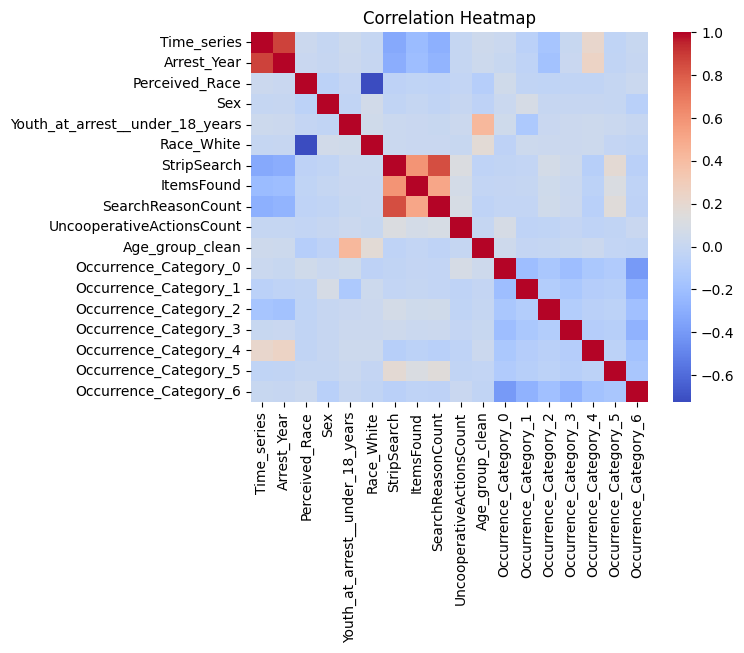

In [530]:
import seaborn as sns

corr_matrix = one_hot_data.corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax, fmt = "0.2f")
ax.set_title('Correlation Heatmap')

plt.show()

# Power Analysis

Calculating sample sizes needed to observe a statistically significant effect at Cohen's d = {0.2, 0.5, 0.8}. 

In [531]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size_small_es = power_analysis.solve_power(effect_size=0.2, power=0.8, alpha=0.05)
sample_size_med_es = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size_large_es = power_analysis.solve_power(effect_size=0.8, power=0.8, alpha=0.05)

sample_sizes = [["For small effect size (d = 0.2)", "For medium effect size (d = 0.5)", "For large effect size (d = 0.8)"], 
                [sample_size_small_es, sample_size_med_es, sample_size_large_es]]

sample_sizes_df = pd.DataFrame(sample_sizes[1:], columns = sample_sizes[0])
sample_sizes_df

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,For small effect size (d = 0.2),For medium effect size (d = 0.5),For large effect size (d = 0.8)
0,393.405693,63.765611,25.524572


# ANCOVA

# Logistic Regression Model